In [1]:
import os, sys
import numpy as np

from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack, join
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from astropy.constants import c as c_speed
from astropy import units as u

# import itertools as it

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({"text.usetex": True})

%matplotlib inline

sys.path.append("/Users/aberti/Desktop/research/desi_lrg_sham")

from halocat_history import read_halocat#, load_trees, get_hist_from_tree, get_subhist_from_tree


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:550: UserWarning: matplotlibrc text.usetex can not be used unless ghostscript-9.00 or later is installed on your system
  % gs_req)


In [27]:
results = np.load("../corrfunc_test.npy").item()
patches = list(results.keys())

cross = "LxL"

count_sets       = [ [results[p][cross][pair_idx][0]["npairs"] for p in patches ] for pair_idx in range(4) ]
count_set_totals = [ [results[p][cross][pair_idx][1] for p in patches ] for pair_idx in range(4) ]

jk_sets       = [ [(sum(count_sets[pair_idx])-this_set) for this_set in count_sets[pair_idx]] for pair_idx in range(4) ] 
jk_set_totals = [ [(sum(count_set_totals[pair_idx])-this_tot) for this_tot in count_set_totals[pair_idx]] for pair_idx in range(4) ]



In [37]:
D1D2_sets, D1R2_sets, D2R1_sets, R1R2_sets = jk_sets

ND1_tots, ND2_tots, NR1_tots, NR2_tots = jk_set_totals


In [38]:
NR1_tots

[146642,
 146722,
 141270,
 137169,
 137521,
 137712,
 140612,
 137219,
 137212,
 137160]

In [39]:
for i in np.arange(len(patches)):
    ND1  = ND1_tots[i]
    ND2  = ND2_tots[i]
    NR1  = NR1_tots[i]
    NR2  = NR2_tots[i]
    D1D2 = D1D2_sets[i]
    D1R2 = D1R2_sets[i]
    D2R1 = D2R1_sets[i]
    R1R2 = R1R2_sets[i]


In [42]:
R1R2 = R1R2.reshape(150,12)

In [49]:
R1R2.reshape(150,12)[:50].flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
t = np.load("../wp_test.npy").item()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


80.0	nan	3.63
90.0	6.01	5.51
100.0	3.98	6.58
110.0	2.22	8.16
120.0	2.57	8.84
130.0	3.39	8.78
140.0	5.83	10.00
150.0	4.96	9.10


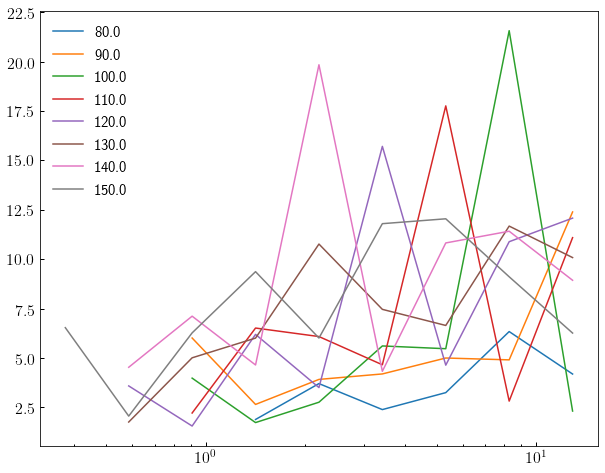

In [81]:
nbins     = 12
rp_min    = 0.1
rp_max    = 20.
rp_bins   = np.logspace( np.log10(rp_min), np.log10(rp_max), nbins + 1 )

fig, ax = plt.subplots(1, 1, figsize=(10,8))

for pi in list(t["GxG"].keys())[4:]:
    d = t["GxG"][pi]
    SNR = np.nanmean(d, axis=0)/np.nanstd(d, axis=0)
    print("{}\t{:.2f}\t{:.2f}".format(pi, np.nanmean(SNR[rp_bins[:-1]<1]), np.nanmean(SNR[rp_bins[:-1]>1])))
    ax.plot(rp_bins[:-1], SNR, label=pi)
ax.semilogx()
ax.legend()

plt.show()


In [83]:
zbins = (0.3,0.4,0.5,0.6,0.7,0.8)
for i in np.arange(len(zbins)-1):
    print(zbins[i])

0.3
0.4
0.5
0.6
0.7


In [ ]:
gal = np.load("data/gal_z0p50-0p60_south_zmaglim20p41.npy")
lrg = np.load("data/lrg_z0p40-0p50_south_zmaglim20p41.npy")


In [ ]:
colors = ["blue","green","magenta","orange","gray"]

bins = np.arange(1000,3000,20)

for i in (3,4,5,6,7):
    gal = np.load(f"data/gal_z0p{i}0-0p{i+1}0_south_zmaglim20p41_pad.npy")
    plt.hist(gal["CZ"][::1], alpha=0.2, color=colors[i-3], bins=bins)
    gal = np.load(f"data/gal_z0p{i}0-0p{i+1}0_south_zmaglim20p41.npy")
    plt.hist(gal["CZ"][::1], alpha=0.5, histtype="step", lw=2, color=colors[i-3], bins=bins)
#     lrg = np.load(f"data/lrg_z0p{i}0-0p{i+1}0_south_zmaglim20p41_pad.npy")
#     plt.hist(gal["CZ"][::10], alpha=0.5)
#     plt.hist(lrg["CZ"], histtype="step", lw=2)

plt.show()


In [ ]:
#-- SNAPNUM | SCALE | REDSHIFT for Bolshoi-Planck simulation
snaps = ascii.read("/Users/aberti/Desktop/research/sims/bolshoip/bolshoip_snaps.txt")


In [ ]:
snap_nums = (148,145,141,138,134,129,125,122,118,115,112)

hist_idx  = [178-i for i in snap_nums]

z_snaps = [snaps["redshift"][snaps["snapnum"]==sn].data[0] for sn in snap_nums]
a_snaps = [snaps["scale"][snaps["snapnum"]==sn].data[0] for sn in snap_nums]

# a_snaps_old = [snaps["scale"][snaps["snapnum"]==sn-1].data[0] for sn in snap_nums]

print("snap\tz\tscale\n")
for i,sn,z,a in zip(range(len(snap_nums)), snap_nums, z_snaps, a_snaps):
    print("{}\t{:.5f}\t{:.5f}".format(sn,z,a))
    if (i-2)%3==0:
        print("")
    
# print(z_snaps)
# print(a_snaps)
# print(hist_idx)


In [ ]:
%%time

spec_all = Table(np.load("../SV3_specz_BGS_LRG.npy"))
spec_all = spec_all[spec_all["Z"] < 6]

print(len(spec_all))


In [ ]:
spec_all.colnames

In [ ]:
patches = ( ((145,155),(0,5)),
            ((176,186),(-3,3)),
            ((206,224),(-3,8)),
            ((192,198),(22,32)),
            ((215,221),(32,38)),
            ((250,258),(32,38)),
            ((232,249),(40,46)),
            ((212,219),(50,55)),
            ((185,195),(58,64)),
            ((239,247),(52,58)),
            ((264,276),(60,70)),
          )
    

In [ ]:
phot_all = Table(np.load("../DR9_photoz_BGS_LRG.npy"))
print(len(phot_all))


In [ ]:
phot_mask = np.any( [((phot_all["RA"] > p[0][0]) & (phot_all["RA"] < p[0][1]) & (phot_all["DEC"] > p[1][0]) & (phot_all["DEC"] < p[1][1])) for p in patches], axis=0 )
phot_all = phot_all[phot_mask]


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

# x, y = phot["RA"], phot["DEC"]
# ax.scatter(x[::100], y[::100], s=2, color="gray", label="photo-z data")

for i,p in enumerate(patches):
    patch_mask = (phot_all["RA"] > p[0][0]) & (phot_all["RA"] < p[0][1]) & (phot_all["DEC"] > p[1][0]) & (phot_all["DEC"] < p[1][1])
    x = phot_all["RA"][patch_mask]
    y = phot_all["DEC"][patch_mask]
    if i==0 : ax.scatter(x, y,  s=2, color="gray", label="photo-z data")
    else : ax.scatter(x, y,  s=2, color="gray")

x, y = spec_all["RA"], spec_all["DEC"]
ax.scatter(x, y, s=2, color="orange", label="spec-z data")

ax.legend(loc=2, fontsize=18, markerscale=10)

ax.set_xlabel("RA (degrees)", fontsize=18)
ax.set_ylabel("Dec (degrees)", fontsize=18)
ax.set_xlim(140,280)
ax.set_xticks(np.arange(140,290,10))
ax.set_ylim(-10,75)
ax.set_yticks(np.arange(-10,80,5))
ax.grid(ls=":")

# for p in patches:
#     ax.scatter(*p, color="red", s=10)

plt.show()


In [ ]:
if "BRICK_OBJID" in spec_all.colnames : spec_all.rename_column("BRICK_OBJID","OBJID")

shared_colnames = [c for c in spec_all.colnames if c in phot_all.colnames]

out = []
for p in patches:
    print(f"PATCH: {p}")
    pmask_phot = (phot_all["RA"] > p[0][0]) & (phot_all["RA"] < p[0][1]) & (phot_all["DEC"] > p[1][0]) & (phot_all["DEC"] < p[1][1])
    pmask_spec = (spec_all["RA"] > p[0][0]) & (spec_all["RA"] < p[0][1]) & (spec_all["DEC"] > p[1][0]) & (spec_all["DEC"] < p[1][1])
    
    phot = phot_all[pmask_phot]
    spec = spec_all[pmask_spec]
    
    out.append(join(phot, spec, join_type="inner", keys=shared_colnames))

combined = vstack(out)
    

In [ ]:
combined


In [ ]:
plt.scatter(combined["Z"][::100], combined["Z_PHOT_MEAN"][::100], s=2)


In [ ]:
combined["Z"]

In [ ]:
spec = combined

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
bins = np.arange(-1,1.01,0.01)
ax.hist(spec[spec["Z_PHOT_MEAN"] > 0]["Z"]-spec[spec["Z_PHOT_MEAN"] > 0]["Z_PHOT_MEAN"], alpha=0.5, bins=bins)
ax.hist(spec[spec["Z_PHOT_MEDIAN"] > 0]["Z"]-spec[spec["Z_PHOT_MEDIAN"] > 0]["Z_PHOT_MEDIAN"], alpha=0.5, bins=bins)

plt.show()


In [ ]:
np.save("../spec_matched.npy", spec)
np.save("../phot_multiples.npy", vstack(phot_multiples))


In [ ]:
halocatfile = "hlist_0.75172.list"
path_to_halocatfile = "/Users/aberti/Desktop/research/sims/bolshoip"
# path_to_treefiles   = "/Users/aberti/Downloads"
# path_to_locfile     = "/Users/aberti/Downloads"

#-- DISPLAY HEADER DESCRIPTIONS

f = open(f"{path_to_halocatfile}/{halocatfile}", "r")

# for i in range(64):
#     print(f.readline())    


In [ ]:
%%time

halocat = read_halocat(f"{path_to_halocatfile}/{halocatfile}", quiet=True)


In [ ]:
# %%time
# #-- treefile information for all z=0 (sub)halos

# loc = Table(np.load(f"{path_to_locfile}/locations.npy"))

# loc.rename_column("TreeRootID","id")
# loc.rename_column("Filename","treefile")
# loc.remove_columns(["FileID","Offset"])


In [ ]:
#-- Example Mz distribution from data

fig, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True)

Mz_bins = np.arange(-24,-16,0.1)
Mz = np.random.normal(-20.1,0.8,int(1e7))
ng_eff = [0.2*len(Mz[Mz>i])/len(Mz) for i in Mz_bins]
ng_eff[-1] = 0

ax = axes[0]
ax.hist(Mz, bins=Mz_bins)

ax = axes[1]
ax.plot(Mz_bins, ng_eff)

for ax in axes : ax.set_xlim(-23,-17)

plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

vpeak = halocat["vpeak"]
vmax  = halocat["vmax"]
vmax_mpeak = halocat["vmax\\@mpeak"]
log_mpeak  = np.log10(halocat["mpeak"])
                     
mhalo_mask = log_mpeak > 10
vpeak_mask = vpeak > 55

mh_bins = np.arange(8.5,15,0.05)
ax.hist(log_mpeak, bins=mh_bins, histtype="step", color="black", lw=2, label=r"${\rm All\ (sub)halos}$")
ax.hist(log_mpeak[mhalo_mask], bins=mh_bins, color="gray", alpha=0.5, label=r"$\log \left(M_{\rm halo}/h^{-1}M_{\odot}\right)>10$")
ax.hist(log_mpeak[vpeak_mask], bins=mh_bins, color="orange", alpha=0.5, label=r"$V_{\rm peak} > 55\ {\rm km\ s}^{-1}$")

ax.legend(frameon=False, fontsize=20)
ax.set_xlabel(r"$\log \left(M_{\rm halo}/h^{-1}M_{\odot}\right)$")
ax.set_xlim(8.5,13)

plt.show()


In [ ]:
%%time

#-- Compute mass-limited (sub)halo distribution as function of Vcirc={Vpeak,Vmax,Vmax@Mpeak}

logv_bins = np.arange(1,3.4,0.05)

cdf_vpeak = [len(halocat[np.log10(vpeak) < b]) for b in logv_bins]
cdf_vmax  = [len(halocat[np.log10(vmax) < b]) for b in logv_bins]
cdf_vmax_mpeak = [len(halocat[np.log10(vmax_mpeak) < b]) for b in logv_bins]

cdf_vpeak_mh_cut = [len(halocat[mhalo_mask & (np.log10(vpeak) < b)]) for b in logv_bins]
cdf_vmax_mh_cut  = [len(halocat[mhalo_mask & (np.log10(vmax) < b)]) for b in logv_bins]
cdf_vmax_mpeak_mh_cut = [len(halocat[mhalo_mask & (np.log10(vmax_mpeak) < b)]) for b in logv_bins]


In [ ]:
def _cdf_inv(cdf, vol_sim=250.**3):
    return (np.max(cdf)-np.array(cdf))/vol_sim


#-- maximum number density of mass-limited (sub)halos
nh_max = np.max(_cdf_inv(cdf_vpeak_mh_cut))
print(f"nh_max:\t{np.round(nh_max,3)}")
vol_sim = 250.**3

#-- total number of (sub)halos in simulation (above mass limit)
Nh_tot = int(nh_max*vol_sim)
print(f"Nh_tot:\t{Nh_tot}")

#-- maximum galaxy number density from data
ng_max = np.max(ng_eff)
print(f"ng_max:\t{np.round(ng_max,3)}")

#-- number of (sub)halos above mass limit to select from simulation
Nh_select = int(ng_max*vol_sim)
print(f"Nh_select: {Nh_select}")

#-- vpeak values of all (sub)halos above mass limit
t = halocat.copy()
halocat_mh_cut = t[mhalo_mask]
del t
vpeak_mh_cut   = halocat_mh_cut["vpeak"]

#-- random mask to selection Mh_select (sub)halos from Mh_tot mass-limited (sub)halos
a = np.concatenate([np.ones(Nh_select, dtype=bool), np.zeros(Nh_tot-Nh_select, dtype=bool)])
np.random.shuffle(a)

#-- selected (sub)halos
halocat_selected = halocat_mh_cut[a]
#print(len(halocat_mh_cut[a]))

#-- Nh_selected(< Vpeak) distribution
cdf_vpeak_selected = [len(halocat_mh_cut[a & (np.log10(vpeak_mh_cut) < b)]) for b in logv_bins]


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

ax = axes[0]
ax.hist(np.log10(vmax), bins=logv_bins, color="gray", alpha=0.2, label=r"$V_{\rm max}$")
ax.hist(np.log10(vpeak), bins=logv_bins, color="magenta", alpha=0.2, label=r"$V_{\rm peak}$")
ax.hist(np.log10(vmax_mpeak), bins=logv_bins, color="teal", alpha=0.2, label=r"$V_{\rm max}@M_{\rm peak}$")

ax.set_xlim(1,2.5)
ax.set_xticks(np.arange(1,2.6,0.2))
ax.set_ylim(0,2e6)
ax.plot(np.log10(55)*np.ones(2),ax.get_ylim(),"k--", label=r"$V_{\rm circ}\simeq55\ {\rm km\ s}^{-1}$")
ax.legend(fontsize=20, loc=2)

ax.hist(np.log10(vmax[mhalo_mask]), bins=logv_bins, histtype="step", color="gray", lw=2)
ax.hist(np.log10(vpeak[mhalo_mask]), bins=logv_bins, histtype="step", color="magenta", lw=2)
ax.hist(np.log10(vmax_mpeak[mhalo_mask]), bins=logv_bins, histtype="step", color="teal", lw=2)
ax.set_xlabel(r"$V_{\rm circ}$", fontsize=20)

ax = axes[1]
vol_sim = 250.**3

ax.plot(logv_bins, _cdf_inv(cdf_vmax), color="gray", lw=10, alpha=0.2)
ax.plot(logv_bins, _cdf_inv(cdf_vpeak), color="magenta", lw=10, alpha=0.2)
ax.plot(logv_bins, _cdf_inv(cdf_vmax_mpeak), color="teal", lw=10, alpha=0.2)
ax.set_xlim(1.2,2.3)
ax.set_xticks(np.arange(1.2,2.4,0.2))

ax.plot(logv_bins, _cdf_inv(cdf_vmax_mh_cut), color="gray", lw=2)
ax.plot(logv_bins, _cdf_inv(cdf_vpeak_mh_cut), color="magenta", lw=2)
ax.plot(logv_bins, _cdf_inv(cdf_vmax_mpeak_mh_cut), color="teal", lw=2)

ax.plot(logv_bins, _cdf_inv(cdf_vpeak_selected), ":", color="magenta", lw=2)

ax.set_xlabel(r"$V_{\rm circ}$", fontsize=20)
ax.set_ylabel(r"$n_{\rm halo}\ (< V_{\rm circ})\ [h^3\ {\rm Mpc}^{-3}]$", fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
%%time

fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

t = halocat.copy()
t.sort("mpeak")
halocat_mpeak_cut = t[-Nh_tot:]

t = halocat.copy()
t.sort("vpeak")
halocat_vpeak_cut = t[-Nh_tot:]
del t

ax = axes[0]
bins = np.arange(1,3,0.02)
ax.hist(np.log10(halocat["vpeak"]), bins=bins, histtype="step", color="black", label="all (sub)halos")
ax.hist(np.log10(halocat_mpeak_cut["vpeak"]), bins=bins, color="gray", alpha=0.5, label="all (sub)halos above mass cut")
ax.hist(np.log10(halocat_selected["vpeak"]), bins=bins, histtype="step", color="black", hatch="///", label="selected (sub)halos above mass cut")
ax.legend(loc=2)#, frameon=True)
ax.set_xlabel(r"$\\log \\left( V_{\\rm peak}/{\\rm km\\ s}^{-1} \\right)$")
ax.set_xlim(0.95,2.65)
ax.set_xticks(np.arange(1,2.8,0.2))


ax = axes[1]
bins = np.arange(9,13,0.05)
ax.hist(np.log10(halocat["mpeak"]), bins=bins, histtype="step", color="black", label="all (sub)halos")
ax.hist(np.log10(halocat_vpeak_cut["mpeak"]), bins=bins, color="gray", alpha=0.5, label="all (sub)halos above Vpeak cut")
ax.hist(np.log10(halocat_selected["mpeak"]), bins=bins, histtype="step", color="black", hatch="///", label="selected (sub)halos")
ax.legend()
ax.set_xlabel(r"$\\log \\left(M_{\\rm halo}/h^{-1}M_{\\odot}\\right)$")
ax.set_xlim(8.9,12.6)

for ax in axes:
    #ax.set_xlim(-24,-16)
    ax.set_ylim(0,9e5)
plt.tight_layout()
plt.show()


In [ ]:
%%time

from scipy import interpolate, stats

nh_of_logv = interpolate.interp1d(logv_bins, _cdf_inv(cdf_vpeak_selected))
mx_of_ng   = interpolate.interp1d(ng_eff, Mz_bins)

nh_new = nh_of_logv(np.log10(halocat_selected["vpeak"]))
mx_new = mx_of_ng(nh_new)

alpha = 0.2
beta  = 0.1
mx0   = -20

sigma = alpha + beta*np.tanh((mx_new - mx0))

mx_new_prime = stats.truncnorm(-2.5, 2.5, mx_new, sigma).rvs()

for c in ("mx_orig","mx_temp","mx_scattered"):
    if c in halocat_selected.colnames : halocat_selected.remove_column(c)
halocat_selected.add_column(Column(mx_new,name="mx_orig"))
halocat_selected.add_column(Column(mx_new_prime,name="mx_temp"))

halocat_selected.sort("mx_temp")
halocat_selected.remove_column("mx_temp")
halocat_selected.add_column(Column(mx_new,name="mx_scattered"))

fig, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True)

ax = axes[0]
ax.hist(Mz, bins=Mz_bins, histtype="step", color="black", lw=2, density=True)
#mx_orig = halocat_selected["mx_orig"]
mx_scat = halocat_selected["mx_scattered"]
ax.hist(mx_scat, bins=Mz_bins, alpha=0.5, color="orange", density=True)

ax = axes[1]
ax.plot(Mz_bins, ng_eff, lw=2, color="black")
ax.plot(Mz_bins, [len(mx_scat[mx_scat>i])/vol_sim for i in Mz_bins], lw=10, alpha=0.5, color="orange")

for ax in axes:
    ax.set_xlim(-23,-17)
    ax.set_xlabel(r"$M_z$")
    
plt.tight_layout()
plt.show()


In [ ]:
# from matplotlib.image import NonUniformImage
# from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

fig = plt.figure(figsize=(12,6))#, sharex=True, sharey=True)

xmin, xmax = 1.65, 2.9
ymin, ymax = -22, -17

aspect = (xmax-xmin)/(ymax-ymin)

xx = np.log10(halocat_selected["vpeak"])
yy = halocat_selected["mx_scattered"]
xedges = logv_bins
yedges = Mz_bins

H = np.histogram2d(xx, yy, bins=(xedges, yedges))[0].T

ax1 = fig.add_subplot(121, aspect=aspect)
ax1.scatter(xx[::100], yy[::100], s=2, color="gray", alpha=0.1)
ax1.scatter(xx[::100], halocat_selected["mx_orig"][::100], s=2, color="darkblue")
ax1.set_ylabel(r"$M_z$")

ax2 = fig.add_subplot(122, aspect=aspect)
X, Y = np.meshgrid(xedges, yedges)
levels = np.logspace(np.log10(H[H>0].min()), np.log10(H.max()), 100)
cmap = plt.get_cmap("plasma")
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
ax2.pcolormesh(X, Y, H, cmap=cmap, norm=norm)
ax2.plot(np.sort(xx[::100]), np.sort(halocat_selected["mx_orig"][::100]), color="white", lw=3)
ax2.set_yticks([])

for ax in (ax1,ax2):
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xlabel(r"$\log \left( V_{\rm peak}/{\rm km\ s}^{-1} \right)$")

plt.tight_layout()
fig.show()


In [ ]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)

mx = halocat_selected["mx_orig"]
mx_scat = halocat_selected["mx_scattered"]

ax.scatter(mx[::100], (mx-mx_scat)[::100], s=2)

plt.show()


In [ ]:
Npts = len(halocat_selected)
Lbox = 250.

coords = np.vstack((halocat_selected["x"],
                    halocat_selected["y"],
                    halocat_selected["z"])).T
Nran = 2*Npts

xran = np.random.uniform(0, Lbox, Nran)
yran = np.random.uniform(0, Lbox, Nran)
zran = np.random.uniform(0, Lbox, Nran)
randoms = np.vstack((xran,yran,zran)).T

rp_bins = np.logspace(np.log10(0.11),np.log10(19.5),13)
pi_max  = 50.


In [ ]:
%%time
from halotools.mock_observables import wp_jackknife

wp, wp_cov = wp_jackknife(coords, randoms, rp_bins, pi_max, Nsub=3, period=Lbox, estimator="Landy-Szalay",
                          do_auto=True, do_cross=False)


In [ ]:
# with open(f"{path_to_halocatfile}/hlist_0.64793.list", "r") as f:

#     ## parse header
#     line0 = f.readline()
#     line0 = line0.strip()
#     colnames = line0.split()

#     ## obtain metadata for table
#     #colnums = (1,5,6,10,11,12,15,16,17,18,19,59,60,61,62,63,69,70,71,72,73,74)
#     colnums = (1,6,16,17,18,19,60,62,70,74)
#     names = [colnames[i][:-4].lower() if (colnames[i][-4]=="(") else colnames[i][:-3].lower() for i in colnums]
#     dtype = [int if (("id" in colnames[i].lower()) or ("?" in colnames[i])) else float for i in colnums]

#     for i in range(len(names)):
#         print(f"{i}\t{colnums[i]}\t{names[i]}")

In [ ]:
def load_hists(scale, path_to_hists=None, quiet=True):
    if path_to_hists==None:
        raise Exception("Must specify path to history files")
    #chunklist = ["a" + str(scale).replace(".","p") + "_trees{}{}{}.npy".format(*i) for i in list(it.product("01234", repeat=3))]
    chunklist = ["a" + str(scale).replace(".","p") + "_trees0{}{}.npy".format(*i) for i in list(it.product("01234", repeat=2))]
    chunks    = []
    for chunkname in chunklist:
        this_chunk = Table(np.load(f"{path_to_hists}/{chunkname}"))
        if not quiet:
            print(f"Loading chunk {chunkname}...")
        for colname in ("treefilename","tree_id","id_hist"):
            if colname in this_chunk.colnames:
                this_chunk.remove_column(colname)
        chunks.append(this_chunk)
    out = vstack(chunks)
    out.rename_column("halo_id","id")
    out.sort("id")
    return out
    

In [ ]:
%%time

hists_a0p64793_trees0XX = load_hists(0.64793, path_to_hists="/Users/aberti/Downloads")


In [ ]:
%%time

halocat_sub = join(halocat_a0p64793, hists_a0p64793_trees0XX, keys="id", join_type="inner")


$${\rm \bf Starvation\ redshift}\ {\rm (Hearin\ et\ al. 2013, Saito\ et\ al. 2016)\!:}$$

$$z_{\rm starve} \equiv {\rm Max}\{z_{\rm char},z_{\rm acc},z_{\rm form}\} $$

${\rm \bf Characteristic\ redshift}\ \left(z_{\rm char}\right)\\
z_{\rm char} = {\rm Snapshot\ at\ which\ halo\ mass\ first\ exceeds}\ 10^{12}\ h^{-1}{\rm M}_\odot,\ {\rm or}\ z_{\rm obs}\ {\rm for\ (sub)halos\ that\ never\ achieve\ this\ mass}$

${\rm \bf Accretion\ redshift}\ \left(z_{\rm acc}\right)\\
z_{\rm acc} = 
\begin{cases}
z_{\rm obs}\ {\rm (for\ host\ halos)}\\
{\rm simulation\ snapshot\ at\ which\ subhalo\ accretes\ onto\ host\ halo}\ {\rm (for\ subhalos)}
\end{cases}$

${\rm \bf Formation\ redshift}\ \left(z_{\rm form}\right)\\
z_{\rm form} = {\rm redshift\ at\ which\ (sub)halo\ transitions\ from\ fast\ to\ slow\ accretion\ regime\!:}$
$$
\begin{align}
z_{\rm form} &= \frac{1}{a_{\rm form}} - 1,\ {\rm where}\ a_{\rm form}=\frac{4.1a_{\rm acc}}{c_{\rm vir}}\  {\rm(Wechsler\ et\ al. 2002,\ 2006)}\\
&= \frac{c_{\rm vir}}{4.1 a_{\rm acc}} - 1, {\rm where}\ c_{\rm vir}=\frac{R_{\rm vir}}{R_{\rm s}}\ {\rm at}
\begin{cases}
z_{\rm obs}\ {\rm (host\ halos)}\\
z_{\rm acc}\ {\rm (subhalos)}
\end{cases}\!,
R_{\rm s}\ {\rm is\ NFW\ profile\ scale\ radius}
\end{align}
$$



In [ ]:
for colname in ("z_char","z_acc","z_form"): #,"z_starve"):
    if colname in halocat_sub.colnames:
        halocat_sub.remove_column(colname)
    halocat_sub.add_column(Column(np.zeros(len(halocat_sub)), name=colname))


In [ ]:
%%time

DS = 1
DSprint = int(DS*(10e4))
quiet = False

Mh_exceeds_12_yes = 0
Mh_exceeds_12_no  = 0

this_scale = 0.64793
hist_len = len(halocat_sub["mvir_hist"][0])

these_snaps  = snaps[:hist_len]
these_scales = these_snaps["scale"]
these_redshifts = these_snaps["redshift"]

z_obs = np.round(a_to_z(this_scale),5)
print(f"This scale:    {this_scale}")
print(f"This redshift: {z_obs}")

for i in range(len(halocat_sub))[::DS]:
    htype = "Host Halo" if halocat_sub["upid"][i]==-1 else "Subhalo"
    include = False
    
    if not quiet and i%DSprint==0:
        print(f"\n========== {htype} {i} ==========")
    
    this_mvir_hist = halocat_sub["mvir_hist"][i]
    this_rvir_hist = halocat_sub["rvir_hist"][i]
    this_rs_hist   = halocat_sub["rs_hist"][i]
    a_acc          = halocat_sub["acc_scale"][i]        

    ## z_char
    mh_max = np.max(np.log10(this_mvir_hist))
    if mh_max >= 12:
        #include = True
        Mh_exceeds_12_yes += 1
        idx        = np.where(np.log10(this_mvir_hist) >= 12)[0][-1]
        z_char_idx = hist_len-(idx+1)
        z_char     = these_redshifts[z_char_idx]
        if not quiet and (i%DSprint==0 or include):
            print(f"\n========== {htype} {i} ==========")
            print("idx\tlog Mh\tscale\tredshift")
        for j in np.concatenate([[0],np.arange(np.max([1,idx-2]),np.min([hist_len-1,idx+3]))]):
            z_char_idx = hist_len-(j+1)
            mark="*" if j==idx else " "
            if not quiet and (i%DSprint==0 or include):
                print(f"  {mark}{j}{mark}\t{round(np.log10(this_mvir_hist[j]),3)}\t{these_scales[z_char_idx]}\t{these_redshifts[z_char_idx]}")
        if not quiet and (i%DSprint==0 or include):
            print(f"z_char = {z_char}")
    else:
        Mh_exceeds_12_no += 1
        z_char = z_obs
        if not quiet and i%DSprint==0:
            print(f"max Mh = {round(mh_max,3)}")
    if not quiet and i%DSprint==0:
        print(f"z_char = {z_char}")
        
    ## z_acc and z_form
    if halocat_sub["upid"][i] == -1: # host halos
        z_acc = z_obs
        cvir  = (this_rvir_hist[0])/(this_rs_hist[0])
    else: # subhalos
        z_acc = 1/a_acc - 1
        z_form_idx = np.where(a_acc==these_scales[::-1])[0][0]
        if not quiet and (i%DSprint==0 or include):
            print("\nidx\tscale\trvir\trs")
            for j in np.arange(np.max([0,z_form_idx-2]),np.min([hist_len,z_form_idx+3])):
                mark="*" if j==z_form_idx else " "
                print(f"{mark}{j}{mark}\t{these_scales[::-1][j]}\t{this_rvir_hist[j]}\t{this_rs_hist[j]}")
        cvir = this_rvir_hist[z_form_idx]/this_rs_hist[z_form_idx]
        if not quiet and (i%DSprint==0 or include):
            print(f"cvir at a_acc={a_acc}: {round(cvir,3)}")
    z_form = np.round(cvir / (4.1*a_acc) - 1, 5)
    if not quiet and (i%DSprint==0 or include):
        print(f"z_form = {z_form}")
        print(f"z_acc  = {z_acc}")

    halocat_sub["z_char"][i] = z_char
    halocat_sub["z_acc"][i]  = z_acc
    halocat_sub["z_form"][i] = z_form
        
print(f"\nHalos achieving 10^12 Msun/h:     {Mh_exceeds_12_yes}")
print(f"Halos not achieving 10^12 Msun/h: {Mh_exceeds_12_no}")
print(f"Correct total number of halos?    {Mh_exceeds_12_no+Mh_exceeds_12_yes==len(halocat_sub[::DS])}\n")


In [ ]:
z_starve = [np.max(i) for i in np.array([halocat_sub["z_char"],halocat_sub["z_acc"],halocat_sub["z_form"]]).T]


In [ ]:
if "z_starve" in halocat_sub.colnames:
    halocat_sub.remove_column("z_starve")
halocat_sub.add_column(Column(z_starve, name="z_starve"))


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

x = halocat_sub["x"]
y = halocat_sub["y"]
z = halocat_sub["z"]

# ax.scatter(halocat_sub["vpeak"][cens], halocat_sub["z_starve"][cens], s=1)
# ax.scatter(halocat_sub["vpeak"][~cens], halocat_sub["z_starve"][~cens], s=1)
#ax.scatter(halocat_sub["vpeak"], halocat_sub["vmax"], s=1)

bins = np.linspace(0,250,51)

# ax.hist(halocat_sub["vpeak"], bins=bins, alpha=0.5)
# ax.hist(halocat_sub["vmax"], bins=bins, alpha=0.5)
# ax.hist(halocat_sub["vmax\@mpeak"], bins=bins, lw=2, histtype="step")

ax.scatter(halocat_sub["vmax\@mpeak"], np.log10(halocat_sub["mpeak"]), s=1, alpha=0.1)

# ax.legend()

ax.set_xlim(0,800)
# ax.set_ylim(0,25)

plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

bins=np.linspace(50,100,26)

vol = (250.**3)/5

nh_vmaxMpeak,_ = np.histogram(halocat_sub["vmax\@mpeak"], bins=bins)
nh_vmax,_ = np.histogram(halocat_sub["vmax"], bins=bins)
nh_vpeak,_ = np.histogram(halocat_sub["vpeak"], bins=bins)

ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vpeak/vol, "--k", lw=2, label=r"$V_{\rm L}=V_{\rm peak}$")
#ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vmax/vol, "-k", lw=2, label=r"$V_{\rm max}$")
ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vmaxMpeak/vol, ":k", lw=2, label=r"$V_{\rm L}=V_{\rm max}@M_{\rm peak}$")

ax.legend(fontsize=24)
ax.set_xlabel(r"$V_{\rm L}\ \left[\ {\rm km\ s}^{-1}\ \right]$", fontsize=20)
ax.set_ylabel(r"${\rm number\ density\ of\ halos } \left[\left(h^{-1}{\rm Mpc}\right)^{-3}\right]$", fontsize=20)
ax.set_xlim(bins[0]-1,bins[-1])
ax.set_ylim(0,0.05)

ax.text(51,0.002, "snapshot subvolume\n"+r"at $z=0.543$", fontsize=20)

ax.tick_params(labelsize=18)

plt.show()
    

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

colors = ["blue","red","green","purple","orange","magenta"]

print("\tz_strv\tlog z_strv")
#for j,halo in enumerate(halocat_sub[1234::int(len(halocat_sub)/5.)]):
#for j,halo in enumerate(halocat_sub[13::int(len(halocat_sub)/5.)]):
for j,halo in enumerate(halocat_sub[np.log10(halocat_sub["mpeak"])>12][3::4000]): #[13::int(len(halocat_sub)/5.)]):
    z_starve = halo["z_starve"]
    lg_z_starve = np.log10(z_starve)
    a_starve = z_to_a(z_starve)
    print( f"{colors[j]}\t", round(halo["z_starve"],2), f"\t{round(lg_z_starve,2)}\t")#, round(z_to_a(halo["z_starve"]),2) )

    axes[0].plot(np.log10(these_redshifts), np.log10(halo["mvir_hist"])[::-1], color=colors[j], alpha=0.5, lw=2)
    axes[1].plot(np.log10(these_redshifts), (halo["rvir_hist"][::-1])/(halo["rs_hist"][::-1]), alpha=0.5, lw=2, color=colors[j])

    mask = [np.abs(np.log10(these_redshifts)-lg_z_starve) < 0.01]
    zs = np.log10(these_redshifts[mask])
    axes[0].plot((lg_z_starve,lg_z_starve), (0,100), ":", color=colors[j])

for ax in axes:
    ax.set_xlim(1,np.log10(0.5))
    xticks = np.log10(these_redshifts[::-16][:-1])
    ax.set_xticks(xticks)
    ax.set_xticklabels([r"${:.1f}$".format(10**i) for i in xticks])
    ax.set_xlabel(r"${\rm redshift}$", fontsize=18)
    

axes[0].set_ylim(9,13.5)
axes[0].set_ylabel(r"$\log M_{\rm vir}\left[\ h^{-1}M_{\odot}\ \right]$", fontsize=20)
axes[1].set_ylim(0,14)
axes[1].set_yticks(np.linspace(0,14,8))
axes[1].set_ylabel(r"${\rm halo\ concentration}\ (c_{\rm vir})$", fontsize=20)


plt.tight_layout()
plt.show()



In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

bins=np.linspace(50,100,26)

# nh_vmaxMpeak,_ = np.histogram(halocat_sub["vmax\@mpeak"], bins=bins)
# nh_vmax,_  = np.histogram(halocat_sub["vmax"], bins=bins)
# nh_vpeak,_ = np.histogram(halocat_sub["vpeak"], bins=bins)

# VL = "vpeak"

# f_z_char = []
# f_z_form = []
# f_z_acc  = []

# for i in range(len(bins)-1):
#     chunk = halocat_sub[(halocat_sub[VL] >= bins[i]) & (halocat_sub[VL] < bins[i+1])]
#     denom = len(chunk)
#     print(denom)
#     N_z_char = len(np.where(chunk["z_starve"]==chunk["z_char"])[0])
#     N_z_form = len(np.where(chunk["z_starve"]==chunk["z_form"])[0])
#     N_z_acc  = len(np.where(chunk["z_starve"]==chunk["z_acc"])[0])

#     f_z_char.append(N_z_char/denom)
#     f_z_form.append(N_z_form/denom)
#     f_z_acc.append(N_z_acc/denom)

    
xx = bins[:-1]+0.5*(bins[1]-bins[0]) 
ax.plot(xx, f_z_char, label="char")
ax.plot(xx, f_z_form, label="form")
ax.plot(xx, f_z_acc, label="acc")
ax.plot(xx, 1-np.add(f_z_char,f_z_form), label="1-(char+form)")
    
# ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vpeak/vol, "--k", lw=2, label=r"$V_{\rm peak}$")
# ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vmax/vol, "-k", lw=2, label=r"$V_{\rm max}$")
# ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vmaxMpeak/vol, ":k", lw=2, label=r"$V_{\rm max}@M_{\rm peak}$")

ax.legend(fontsize=24)
# ax.set_xlabel(r"$V_{\rm L}\ \left[\ {\rm km\ s}^{-1}\ \right]$", fontsize=20)
# ax.set_ylabel(r"${\rm number\ density\ of\ halos } \left[\left(h^{-1}{\rm Mpc}\right)^{-3}\right]$", fontsize=20)
ax.tick_params(labelsize=18)

plt.show()
    

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

bins = np.linspace(0.5,10,20)

cens = halocat_sub["upid"]==-1

ax.hist(halocat_sub["z_form"][cens], bins=bins, label=r"$z_{\rm form}\ {\rm (halos)}$", density=True, color="blue", histtype="step", hatch="//", lw=2)
ax.hist(halocat_sub["z_form"][~cens], bins=bins, density=True, color="blue", alpha=0.3)

bins = np.linspace(0,15,31)

ax.hist(halocat_sub["z_char"][cens & (np.log10(halocat_sub["mpeak"])>=12)], bins=bins, density=True, color="black", histtype="step", hatch="\\\\", lw=2)
ax.hist(halocat_sub["z_char"][~cens & (np.log10(halocat_sub["mpeak"])>=12)], bins=bins, density=True, color="black", alpha=0.3)

ax.set_xlim(0,10)

ax.text(3,0.55, r"subvolume of snapshot at $z=0.543$", fontsize=20)
ax.text(5,0.4, r"BLUE: $z_{\rm form}$" + "\n" +r"GRAY: $z_{\rm char}$", fontsize=20)
ax.text(5,0.3,r"HATCHED: host halos" + "\n" + r"SOLID: subhalos", fontsize=20)
# ax.legend()
# xx = bins[:-1]+0.5*(bins[1]-bins[0]) 
# ax.plot(xx, f_z_char, label="char")
# ax.plot(xx, f_z_form, label="form")
# ax.plot(xx, 1-np.add(f_z_char,f_z_form), label="acc")
    
# ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vpeak/vol, "--k", lw=2, label=r"$V_{\rm peak}$")
# ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vmax/vol, "-k", lw=2, label=r"$V_{\rm max}$")
# ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),nh_vmaxMpeak/vol, ":k", lw=2, label=r"$V_{\rm max}@M_{\rm peak}$")

#ax.legend(fontsize=24)
ax.set_xlabel(r"${\rm redshift}$", fontsize=20)
ax.set_ylabel(r"${\rm relative\ number\ of\ halos/subhalos}$", fontsize=20)
ax.tick_params(labelsize=18)

plt.show()
    

In [ ]:
# j = 0

# quiet = False


# # snap_dir = "/uufs/chpc.utah.edu/common/home/astro/dawson/aberti/bolshoip"

# # path_to_z0p0_histories = "/uufs/chpc.utah.edu/common/home/astro/dawson/aberti/bolshoip"
# path_to_z0p0_histories = "/Users/aberti/Downloads"

# # path_to_lookup_tables  = "/uufs/chpc.utah.edu/common/home/astro/dawson/aberti/bolshoip/tree_lookup_tables"
# path_to_lookup_tables = "/Users/aberti/Downloads"

# # path_to_treefiles = "/uufs/chpc.utah.edu/common/home/astro/dawson/aberti/bolshoip/TREES"
# path_to_treefiles = "/Users/aberti/Downloads"

# # history_save_dir  = "/uufs/chpc.utah.edu/common/home/astro/dawson/aberti/bolshoip/HISTORIES"
# history_dir = "/Users/aberti/Downloads"


# treefilelist = ["tree_{}_{}_{}.dat".format(j,*i) for i in list(it.product("01234", repeat=2))]
# #treefilelist = ["tree_0_4_2.dat", ""]


# for treefilename in treefilelist:
#     if not quiet:
#         print(f"Loading {treefilename}...")
#     this_treefile = load_trees(f"{path_to_treefiles}/{treefilename}", quiet=True)
#     #this_treefile = trees042
    
#     for scale in a_snaps:
#         this_scale = scale
#         hist_len   = snaps["snapnum"][snaps["scale"]==this_scale].data[0]
#         this_hist_idx = hist_idx[np.where(a_snaps==this_scale)[0][0]]

#         this_chunkname = "a" + str(this_scale).replace(".","p") + "_trees" + "{}{}{}".format(*treefilename.split("_")[1:])[:3] + ".npy"
#         if not quiet:
#             print(f"  Loading chunk {this_chunkname}...")
#         this_chunk = Table(np.load(f"{history_dir}/{this_chunkname}"))
        
#         mask = this_chunk["id_hist"][:,0]==0
#         N_halos = len(this_chunk[mask])
        
#         if not quiet:
#             print(f"    Histories needed for {N_halos} of {len(this_chunk)} halos...")
        
#         for i in range(N_halos):
#             this_halo_id = this_chunk[mask]["halo_id"][i]
#             this_tree_id = this_chunk[mask]["tree_id"][i]
    
#             mvir_hist, rvir_hist, rs_hist, id_hist = get_subhist_from_tree(this_halo_id, this_treefile, this_tree_id, N_steps=hist_len)
#             if i%1000==0 and i>0 and not quiet:
#                 print(f"    {i} / {N_halos}")
#                 print(f"\t{id_hist}")
                
#             this_chunk["mvir_hist"][this_chunk["halo_id"]==this_halo_id] = mvir_hist
#             this_chunk["rvir_hist"][this_chunk["halo_id"]==this_halo_id] = rvir_hist
#             this_chunk["rs_hist"][this_chunk["halo_id"]==this_halo_id]   = rs_hist
#             this_chunk["id_hist"][this_chunk["halo_id"]==this_halo_id]   = id_hist

#         if not quiet:
#             print(f"  Saving chunk...\n")
#         np.save(f"{history_dir}/{this_chunkname}", this_chunk)


In [ ]:
%%time

trees042 = load_trees(f"{path_to_treefiles}/tree_0_4_2.dat.gz", quiet=True)

trees230 = load_trees(f"{path_to_treefiles}/tree_2_3_0.dat.gz", quiet=True)
